### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=20
skip_qubits=1
max_circuits=1
num_shots=10000

K = 5             # number of Trotter steps
t = 1.0           # total evolution time

group_method = "simple"   # method to generate commuting groups
                            # None, "simple", "1", "2", "N"

#backend_id="qasm_simulator"
backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

api="qiskit"


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/qiskit")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "qiskit")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/tfim/tfim.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:47:17 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.061
... exact computation time = 0.012 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -3.2266
    ==> Simulation Quality: 0.807

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.033
... exact computation time = 0.018 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: -2.5234
    ==> Simulation Quality: 0.841

************
Executing [1] circuits with nu

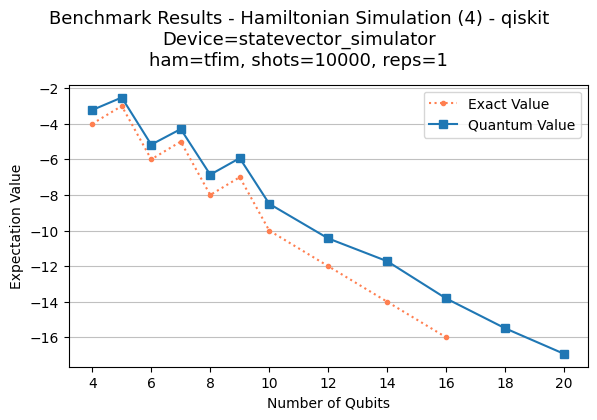

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=tfim, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
[0.012, 0.018, 0.025, 0.034, 0.043, 0.057, 0.073, 0.129, 0.308, 1.279]
[0.061, 0.033, 0.039, 0.041, 0.049, 0.052, 0.061, 0.079, 0.111, 0.117, 0.178, 0.345]


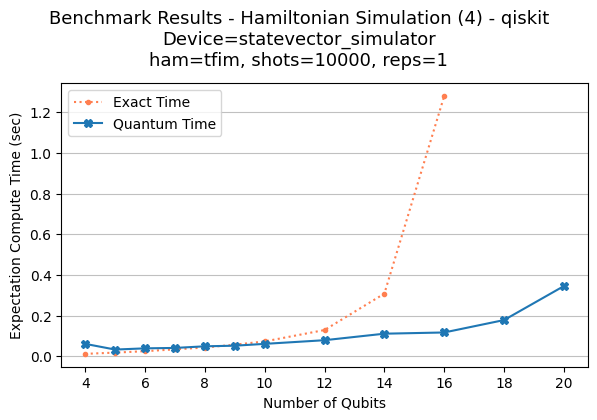

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,  
            do_observables = True, group_method = group_method,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/heisenberg/heis.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:47:27 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.076
... exact computation time = 0.019 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: -2.9688
    ==> Simulation Quality: 0.742

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.09
... exact computation time = 0.031 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm: -4.2266
    ==> Simulation Quality: 4.227

************
Executing [1] circuits wi

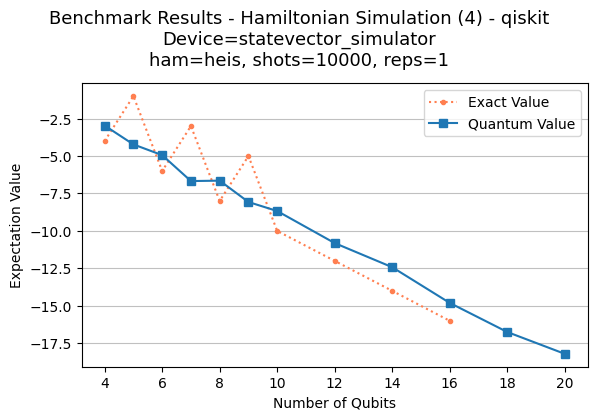

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=heis, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
[0.019, 0.031, 0.042, 0.058, 0.064, 0.099, 0.128, 0.214, 0.434, 1.408]
[0.076, 0.09, 0.105, 0.122, 0.236, 0.152, 0.178, 0.22, 0.402, 0.353, 0.463, 0.788]


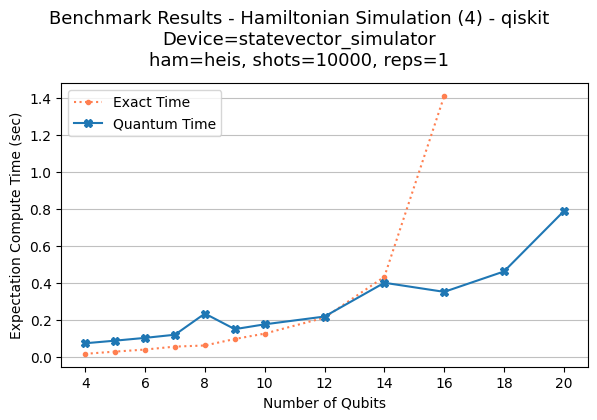

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/fermihubbard/FH_D-1.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:47:35 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... total execution time = 0.036
... exact computation time = 0.016 sec

    Exact expectation value, computed classically: 0.0
    Estimated expectation value, from quantum algorithm: -0.292
    ==> Simulation Quality: -197760528381585.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... total execution time = 0.245
... exact computation time = 0.041 sec

    Exact expectation value, computed classically: 0.0
    Estimated expectation value, from quantum algorithm: 1.6846
    ==> Simulation Quality: 303465209

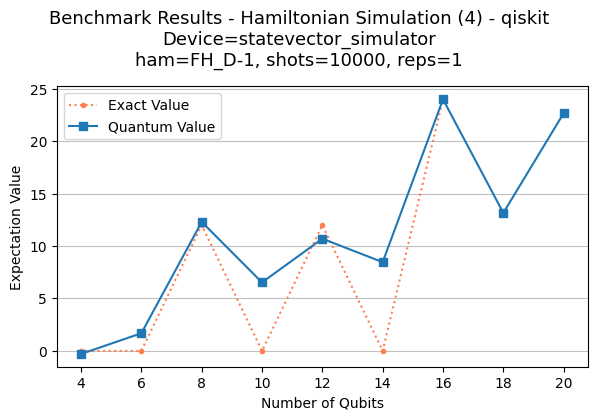

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=FH_D-1, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16, 18, 20]
[0.016, 0.041, 0.072, 0.117, 0.182, 0.415, 2.153]
[0.036, 0.245, 0.248, 0.601, 0.765, 1.245, 0.929, 2.809, 7.681]


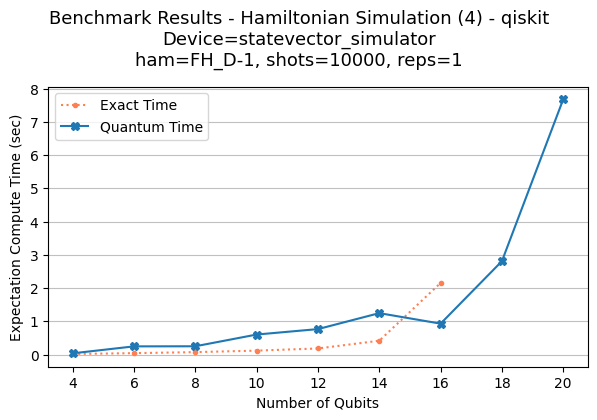

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/bosehubbard/BH_D-1_d-4.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:47:55 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... total execution time = 0.631
... exact computation time = 0.042 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: 41.3259
    ==> Simulation Quality: 0.689

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... total execution time = 1.558
... exact computation time = 0.119 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, from quantum algorithm: 39.2061
    ==> Simulation Qualit

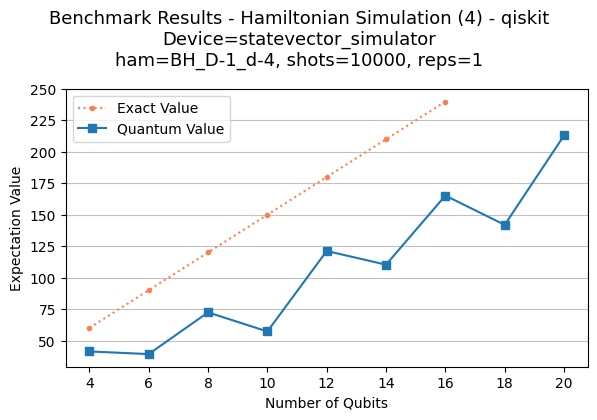

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=BH_D-1_d-4, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16, 18, 20]
[0.042, 0.119, 0.243, 0.427, 0.678, 1.336, 3.792]
[0.631, 1.558, 2.193, 3.472, 4.222, 7.972, 6.526, 9.009, 13.464]


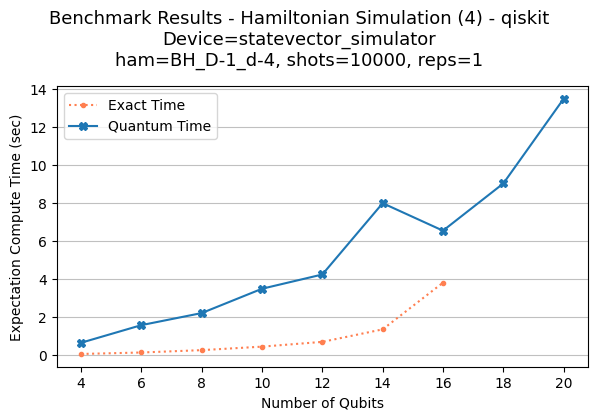

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
            min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
            hamiltonian_params = hamiltonian_params,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/binaryoptimization/max3sat/random/random_max3sat-hams.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:48:54 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... total execution time = 0.036
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... total execution time = 0.048
... exact computation time = 0.024 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 8.0
    ==> Simulation Quality: 1.0

************
Executing [1] circuits with num_qu

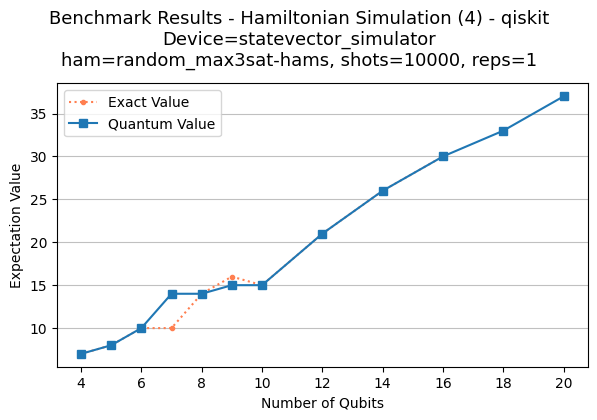

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=random_max3sat-hams, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
[0.014, 0.024, 0.039, 0.065, 0.087, 0.122, 0.167, 0.267, 0.361, 1.153]
[0.036, 0.048, 0.057, 0.09, 0.097, 0.131, 0.137, 0.198, 0.306, 0.489, 0.403, 0.875]


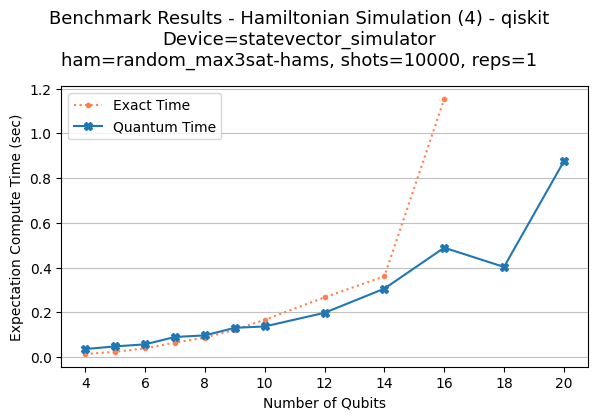

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/chemistry/electronic/standard/H2.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:49:00 UTC
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... total execution time = 0.102
... exact computation time = 0.017 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: -0.4594
    ==> Simulation Quality: 0.856

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... total execution time = 2.897
... exact computation time = 0.099 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: -0.2419
    ==> Simulation Quality: 0.474

************
Executing [1] circuits with num_qubits = 8
... dataset_name = ham_BK-8
... 

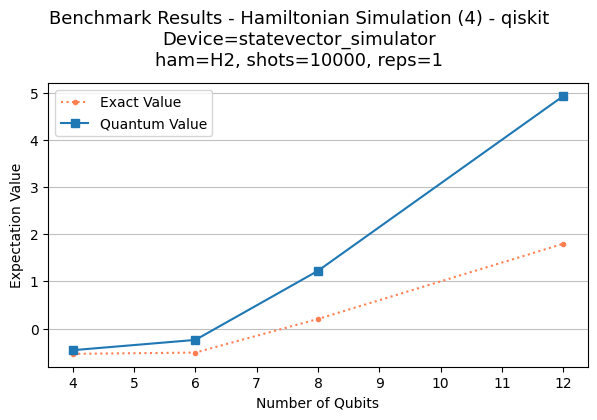

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - qiskit
Device=statevector_simulator
ham=H2, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 12]
[0.017, 0.099, 0.338, 1.358]
[0.102, 2.897, 25.146, 58.393]


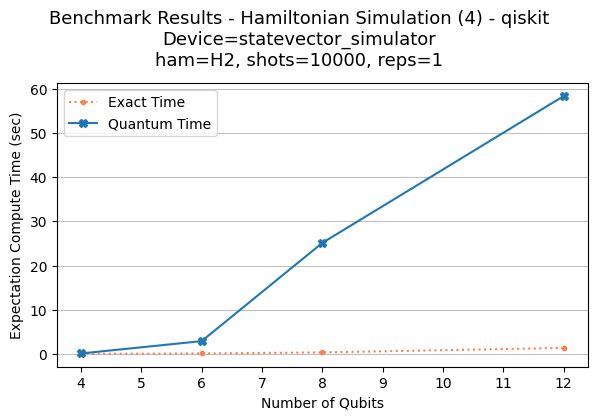

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 12), skip_qubits=skip_qubits,
            max_circuits=max_circuits, num_shots=num_shots,
            method=4, hamiltonian = hamiltonian_name, K = K, t = t,
            hamiltonian_params = hamiltonian_params,
            do_observables = True,
            backend_id=backend_id, provider_backend=provider_backend,
            hub=hub, group=group, project=project, exec_options=exec_options,
            api=api)

### Combined Benchmark Results

In [10]:
import qiskit
print(qiskit.__version__)

1.2.1
